# Declaration of Originality

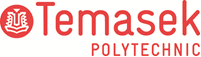

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Lim Hong Yu (2401841H)
* Tutorial Group                :  p04
* Tutor						    :  Emile Sebastian
* Submission Date               : 11 feb 2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [27]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly


# 1. Business Understanding
Goal: ?

# 2. Data Understanding

## 2.1 Load dataset

In [28]:
## Read *.csv file into pandas DataFrame
FILE_PATH = "../data/Cardiovascular_Disease_Dataset.csv"
df=pd.read_csv(FILE_PATH)
print(f"\nDataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()


Dataset loaded successfully!
Shape: (1000, 14)

First few rows:


,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


## 2.2 Summary Statistics

In [29]:
## Understand the type of variable for each column
## 2.2 Summary Statistics
#data sanity check
df.shape
# Understand the structure and data types of each column
df.info()

# Generate summary statistics for numerical features
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [30]:

# Check for missing values in each column
df.isnull().sum()


patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [31]:
## Describe data distribution
# Check class distribution of the target variable
df['target'].value_counts()


target
1    580
0    420
Name: count, dtype: int64

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

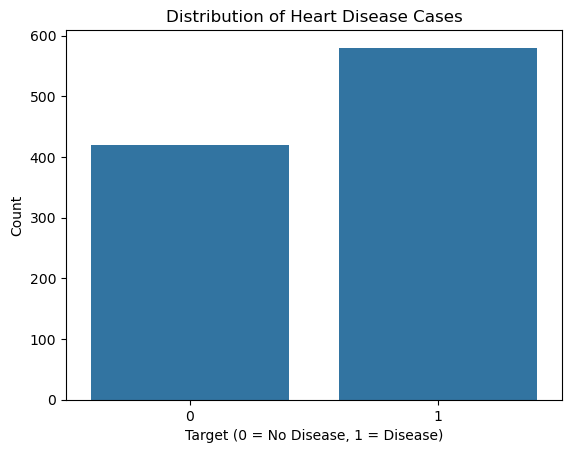

In [ ]:
## Understanding distribution of target
# Visualize the distribution of the target variable
sns.countplot(x='target', data=df)
plt.title("Distribution of Heart Disease Cases")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()
#Whether the dataset is balanced
#imbalance matters in healthcare (false negatives are risky)

### 2.3.1.2 Understanding distribution of features


Numerical features to visualize: 12


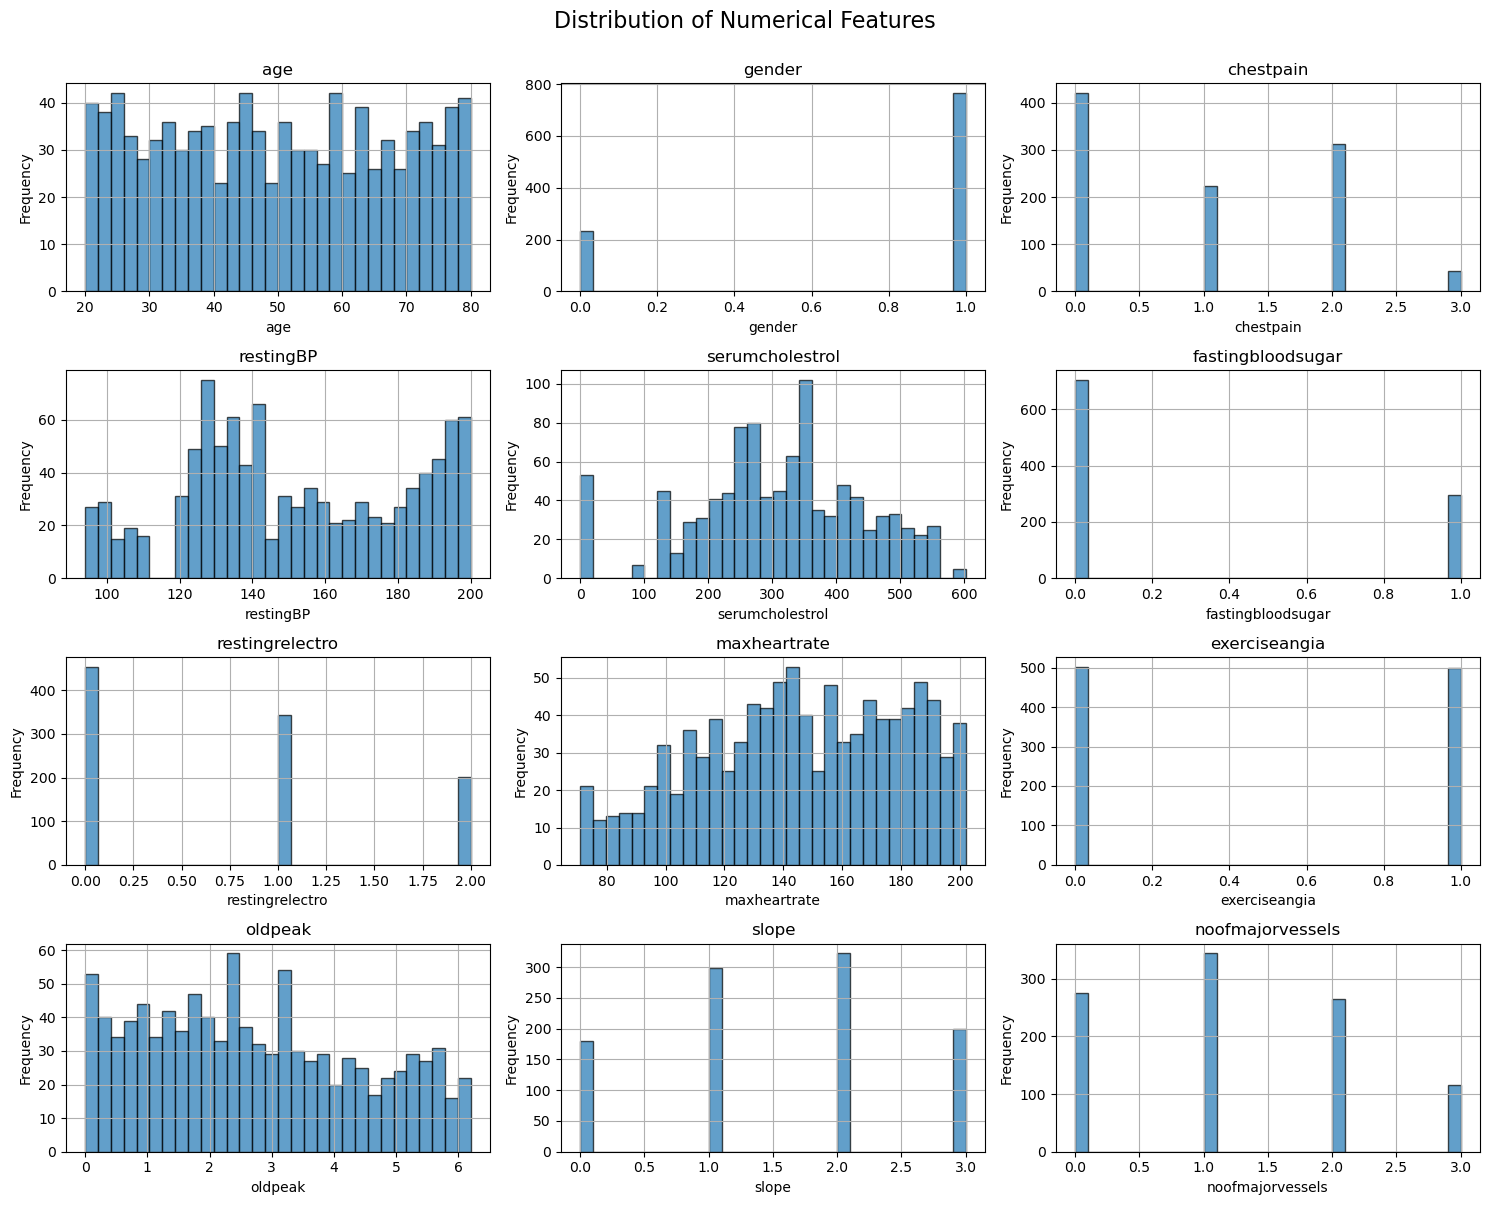


------------------------------------------------------------
Box Plots - Checking for Outliers
------------------------------------------------------------


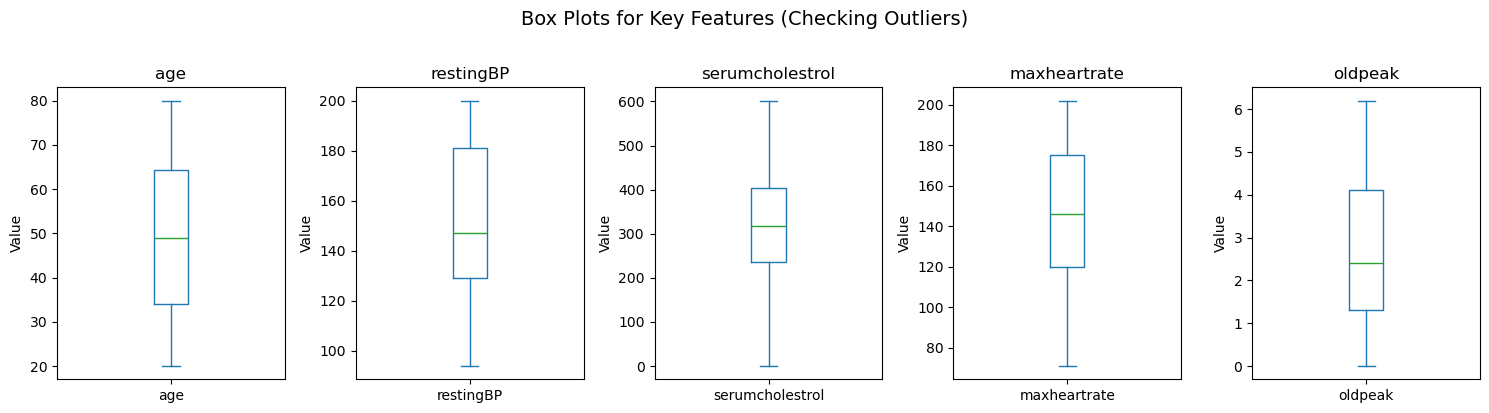

In [ ]:
### Understanding distribution of features

# Select numerical features only
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove patientid and target
numerical_cols.remove('patientid')
numerical_cols.remove('target')

print(f"\nNumerical features to visualize: {len(numerical_cols)}")

# Create histograms for numerical features
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    df[col].hist(bins=30, ax=axes[idx], edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.suptitle("Distribution of Numerical Features", fontsize=16, y=1.00)
plt.tight_layout()
plt.show()



### Box plots to check for outliers
print("\n" + "-"*60)
print("Box Plots - Checking for Outliers")
print("-"*60)

key_features = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']

fig, axes = plt.subplots(1, 5, figsize=(15, 4))

for idx, col in enumerate(key_features):
    df[col].plot(kind='box', ax=axes[idx])
    axes[idx].set_title(f'{col}')
    axes[idx].set_ylabel('Value')

plt.suptitle("Box Plots for Key Features (Checking Outliers)", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


### 2.3.2 Understanding relationship between variables


------------------------------------------------------------
Multivariate Analysis - Relationships
------------------------------------------------------------


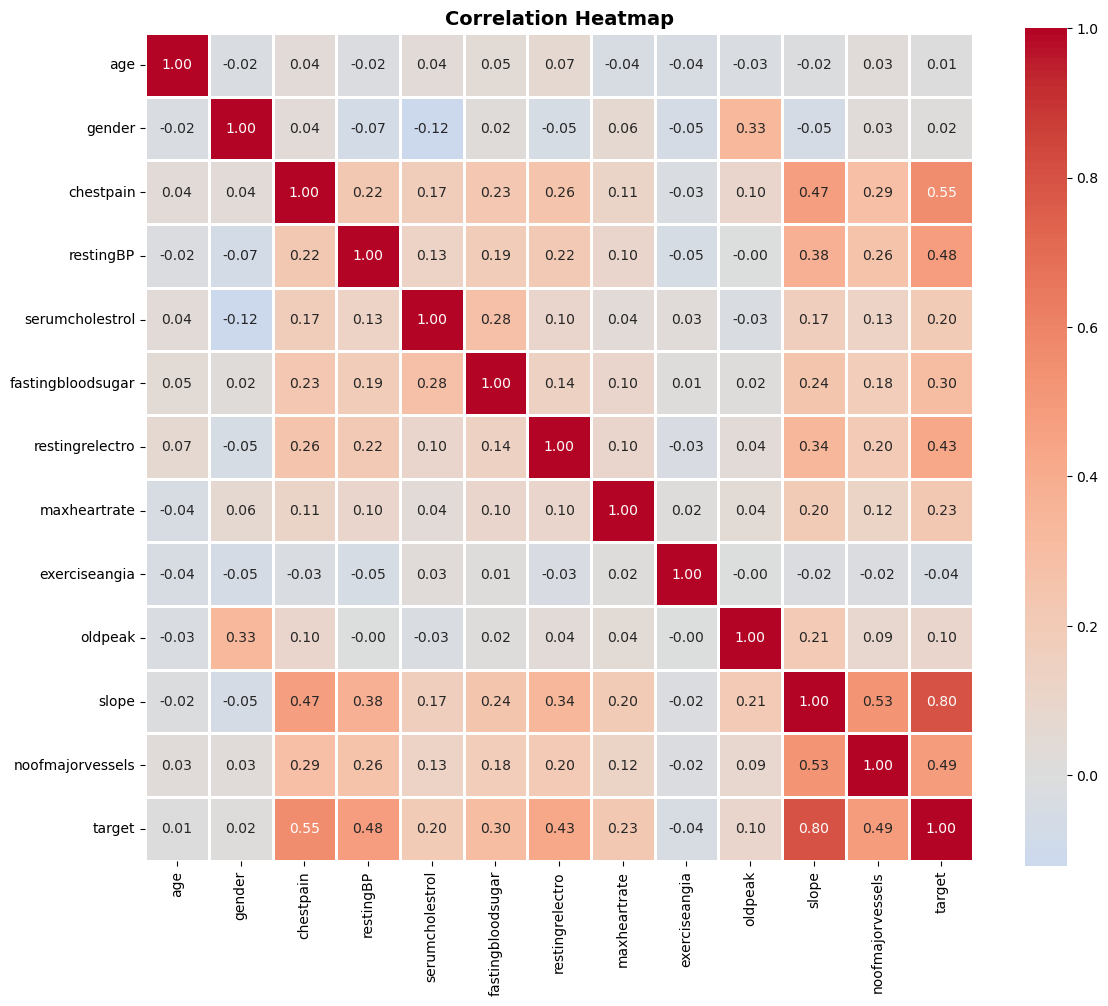


Top correlations with target:
target               1.000000
slope                0.797358
chestpain            0.554228
noofmajorvessels     0.489866
restingBP            0.482387
restingrelectro      0.426837
fastingbloodsugar    0.303233
maxheartrate         0.228343
serumcholestrol      0.195340
oldpeak              0.098053
gender               0.015769
age                  0.008356
exerciseangia       -0.039874
Name: target, dtype: float64


In [34]:
print("\n" + "-"*60)
print("Multivariate Analysis - Relationships")
print("-"*60)

# Correlation heatmap
plt.figure(figsize=(12, 10))
# Drop patientid before correlation
correlation_matrix = df.drop(columns=['patientid']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=1)
plt.title("Correlation Heatmap", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Show correlations with target
print("\nTop correlations with target:")
target_corr = correlation_matrix['target'].sort_values(ascending=False)
print(target_corr)


# 3. Data Preparation

## 3.1 Data Cleaning

In [35]:
## Clean data
# 3. Data Preparation

## 3.1 Data Cleaning
# Drop patient identification number as it does not contribute to prediction
df_clean = df.drop(columns=['patientid'])
print(f"Dropped: patientid")
print(f"Remaining columns: {df_clean.shape[1]}")
print(f"Remaining rows: {df_clean.shape[0]}")
df_clean

Dropped: patientid
Remaining columns: 13
Remaining rows: 1000


,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,45,1,1,186,417,0,1,117,1,5.9,3,2,1


In [36]:
#checking for anomalies
# Based on metadata, let's check if values make sense
print("\nAge range:", df_clean['age'].min(), "to", df_clean['age'].max())
print("Resting BP range:", df_clean['restingBP'].min(), "to", df_clean['restingBP'].max())
print("Max heart rate range:", df_clean['maxheartrate'].min(), "to", df_clean['maxheartrate'].max())


Age range: 20 to 80
Resting BP range: 94 to 200
Max heart rate range: 71 to 202


In [ ]:
print("\n" + "-"*60)
print("One-Hot Encoding for Categorical Variables")
print("-"*60)

# First, let's identify which columns are categorical
# These are columns where the numbers represent categories, not quantities

# Check data types and actual column names
print("\nData types before OHE:")
print(df_clean.dtypes)
print("\nAll columns:")
print(df_clean.columns.tolist())

# IMPORTANT: Check actual column names in YOUR dataset
# The column names might be different (e.g., 'restingElectro' vs 'restingelectro')

# Reminder: How to tell if a column should be categorical?
# Try "doubling" the value - does it make sense?
# - gender: Does gender=2 make sense? NO → Categorical
# - age: Does age=60 make sense if age=30? YES → Numeric
# - chestpain type 2: Is it "twice" as much as type 1? NO → Categorical

# Let's automatically identify categorical columns
# by checking unique values and excluding continuous variables
categorical_columns = []
continuous_vars = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 
                   'oldpeak', 'weight', 'height']

for col in df_clean.columns:
    if col == 'target':  # Skip target variable
        continue
    
    n_unique = df_clean[col].nunique()
    
    # If column has ≤ 10 unique values and isn't continuous, it's likely categorical
    if n_unique <= 10 and col not in continuous_vars:
        categorical_columns.append(col)
        print(f"  {col}: {n_unique} unique values → Categorical")

print(f"\nCategorical columns to encode: {categorical_columns}")

# Apply One-Hot Encoding
# drop_first=True removes one column to avoid multicollinearity
# (if Female=0, then Male=1, so we only need one column)
df_encoded = pd.get_dummies(df_clean, 
                             columns=categorical_columns, 
                             drop_first=True)

print(f"\nShape before OHE: {df_clean.shape}")
print(f"Shape after OHE: {df_encoded.shape}")
print(f"Columns added: {df_encoded.shape[1] - df_clean.shape[1]}")

print("\nNew columns created:")
new_cols = [col for col in df_encoded.columns if col not in df_clean.columns]
for col in new_cols:
    print(f"  - {col}")

# Why One-Hot Encoding?
# - Machine learning models only accept numbers
# - Simply using 0, 1, 2, 3 for categories implies:
#   * Category 3 is "3 times more" than Category 1
#   * Category 2 is "in between" Category 1 and 3
# - This doesn't make sense for nominal categories!
# - OHE creates separate binary columns (True/False or 1/0)
#   * Each category gets its own column
#   * No false ordering is implied

# Example: gender column becomes gender_1 (Male=True/1, Female=False/0)
# Example: chestpain (0,1,2,3) becomes:
#   - chestpain_1 (True if type 1, False otherwise)
#   - chestpain_2 (True if type 2, False otherwise)  
#   - chestpain_3 (True if type 3, False otherwise)
#   - Type 0 is when ALL are False (that's why we drop_first=True)



------------------------------------------------------------
One-Hot Encoding for Categorical Variables
------------------------------------------------------------

Data types before OHE:
age                    int64
gender                 int64
chestpain              int64
restingBP              int64
serumcholestrol        int64
fastingbloodsugar      int64
restingrelectro        int64
maxheartrate           int64
exerciseangia          int64
oldpeak              float64
slope                  int64
noofmajorvessels       int64
target                 int64
dtype: object

All columns:
['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol', 'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels', 'target']
  gender: 2 unique values → Categorical
  chestpain: 4 unique values → Categorical
  fastingbloodsugar: 2 unique values → Categorical
  restingrelectro: 3 unique values → Categorical
  exerciseangia: 2 unique values → C

In [38]:
df_encoded

,age,restingBP,serumcholestrol,maxheartrate,oldpeak,target,gender_1,chestpain_1,chestpain_2,chestpain_3,fastingbloodsugar_1,restingrelectro_1,restingrelectro_2,exerciseangia_1,slope_1,slope_2,slope_3,noofmajorvessels_1,noofmajorvessels_2,noofmajorvessels_3
0,53,171,0,147,5.3,1,True,False,True,False,False,True,False,False,False,False,True,False,False,True
1,40,94,229,115,3.7,0,True,False,False,False,False,True,False,False,True,False,False,True,False,False
2,49,133,142,202,5.0,0,True,False,True,False,False,False,False,True,True,False,False,False,False,False
3,43,138,295,153,3.2,1,True,False,False,False,True,True,False,False,False,True,False,False,True,False
4,31,199,0,136,5.3,1,True,True,False,False,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,48,139,349,183,5.6,1,True,False,True,False,False,False,True,True,False,True,False,False,True,False
996,47,143,258,98,5.7,0,True,False,False,True,True,True,False,True,True,False,False,False,False,False
997,69,156,434,196,1.4,1,True,False,False,False,True,False,False,False,False,False,True,True,False,False
998,45,186,417,117,5.9,1,True,True,False,False,False,True,False,True,False,False,True,False,True,False


## 3.2 Train-Test Split

In [39]:
## Split data into train set and test set
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop(columns=['target'])  # All columns except target
y = df_encoded['target']  # Target stays as 0/1

# Split data into training and testing sets
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y # Maintain class balance
)
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\nTrain set - Class distribution:")
print(f"  No Disease (0): {(y_train == 0).sum()} ({(y_train == 0).sum()/len(y_train)*100:.1f}%)")
print(f"  Disease (1): {(y_train == 1).sum()} ({(y_train == 1).sum()/len(y_train)*100:.1f}%)")

print(f"\nTest set - Class distribution:")
print(f"  No Disease (0): {(y_test == 0).sum()} ({(y_test == 0).sum()/len(y_test)*100:.1f}%)")
print(f"  Disease (1): {(y_test == 1).sum()} ({(y_test == 1).sum()/len(y_test)*100:.1f}%)")


Training set: 800 samples (80.0%)
Test set: 200 samples (20.0%)

Train set - Class distribution:
  No Disease (0): 336 (42.0%)
  Disease (1): 464 (58.0%)

Test set - Class distribution:
  No Disease (0): 84 (42.0%)
  Disease (1): 116 (58.0%)


# 4. Modelling

### 4.2 Train Model

In [40]:
## Initialise and train model
from sklearn.linear_model import LogisticRegression

# Initialize model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train model
model.fit(X_train, y_train)


c:\Users\corri\anaconda3\envs\mldp\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


# 5. Model Evaluation

In [41]:
## Evaluate model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on test set
y_pred = model.predict(X_test)

print(f"Predictions made on {len(y_pred)} test samples")
print(f"\nFirst 10 predictions vs actual:")
print("Predicted:", y_pred[:10])
print("Actual:   ", y_test.values[:10])

# How many did we get right?
correct = (y_pred == y_test).sum()
print(f"\nCorrect predictions: {correct}/{len(y_test)} ({correct/len(y_test)*100:.1f}%)")

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Predictions made on 200 test samples

First 10 predictions vs actual:
Predicted: [0 0 1 1 0 0 1 0 0 1]
Actual:    [0 0 1 1 0 0 1 0 0 1]

Correct predictions: 194/200 (97.0%)
Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        84
           1       0.97      0.98      0.97       116

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



In [56]:
# ==========================================
# PREDICT NEW PATIENT
# ==========================================

## New patient data (raw values)
X_unseen = [
    [55, 1, 140, 240, 1, 2, 1, 150, 1, 2.5, 2, 1]  ## sample 1
]

## Convert to OHE Pandas DataFrame
col_df_X = df_clean.drop('target', axis=1).columns  ## Columns before OHE
col_ohe = X.columns.tolist()  ## Columns after OHE

X_unseen = pd.DataFrame(X_unseen, columns=col_df_X)  ## Convert to DataFrame
X_unseen = pd.get_dummies(X_unseen, drop_first=True)  ## OHE
X_unseen = X_unseen.reindex(columns=col_ohe, fill_value=0)  ## Match training
display(X_unseen)

## Predict
model.predict(X_unseen)

,age,restingBP,serumcholestrol,maxheartrate,oldpeak,gender_1,chestpain_1,chestpain_2,chestpain_3,fastingbloodsugar_1,restingrelectro_1,restingrelectro_2,exerciseangia_1,slope_1,slope_2,slope_3,noofmajorvessels_1,noofmajorvessels_2,noofmajorvessels_3
0,55,240,1,150,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0


array([0])

## Iterative model development


In [43]:
## Further feature engineering / feature selection

In [44]:
print("="*60)
print("ITERATION 1: BASELINE MODEL")
print("="*60)

"""
already have:
Logistic Regression with default parameters
Accuracy: ~87%
"""

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Baseline model
baseline_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")
print("\nBaseline Classification Report:")
print(classification_report(y_test, y_pred_baseline))

# Store results for comparison
results = {
    'Model': ['Logistic Regression (Baseline)'],
    'Accuracy': [baseline_accuracy],
    'Notes': ['Default parameters, all features']
}

ITERATION 1: BASELINE MODEL
Baseline Accuracy: 0.9700

Baseline Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        84
           1       0.97      0.98      0.97       116

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



c:\Users\corri\anaconda3\envs\mldp\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



ITERATION 2: EXPERIMENTING WITH DIFFERENT MODELS

------------------------------------------------------------
Model 2: Decision Tree
------------------------------------------------------------
Decision Tree Accuracy: 0.9450
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        84
           1       0.94      0.97      0.95       116

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200


------------------------------------------------------------
Model 3: Random Forest
------------------------------------------------------------
Random Forest Accuracy: 0.9850
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        84
           1       0.99      0.98      0.99       116

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       2

C:\Users\corri\AppData\Local\Temp\ipykernel_17736\2473007606.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Accuracy', y='Model', palette='viridis')


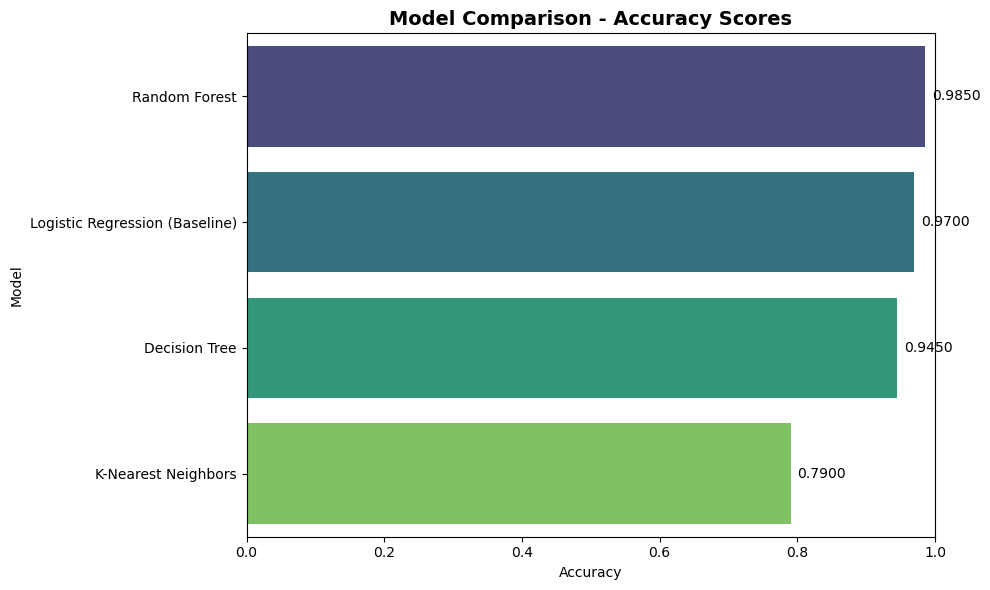


------------------------------------------------------------
ITERATION 2 FINDINGS:
------------------------------------------------------------

Best performing model: Random Forest
Accuracy: 0.9850

Rationale for model selection:
- Random Forest typically performs best for this type of data
- It handles non-linear relationships well
- Less prone to overfitting than Decision Tree
- More interpretable than complex models



In [45]:
# ==========================================
# ITERATION 2: TRY DIFFERENT ALGORITHMS
# ==========================================

print("\n" + "="*60)
print("ITERATION 2: EXPERIMENTING WITH DIFFERENT MODELS")
print("="*60)

"""
Try at least 2-3 different algorithms to see which performs best.
Common choices for classification:
- Decision Tree
- Random Forest
- K-Nearest Neighbors (KNN)
- Support Vector Machine (SVM)
- Gradient Boosting

Must use scikit-learn ONLY!
"""

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## Model 2: Decision Tree
print("\n" + "-"*60)
print("Model 2: Decision Tree")
print("-"*60)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(classification_report(y_test, y_pred_dt))

# Add to results
results['Model'].append('Decision Tree')
results['Accuracy'].append(dt_accuracy)
results['Notes'].append('Default parameters')

## Model 3: Random Forest
print("\n" + "-"*60)
print("Model 3: Random Forest")
print("-"*60)

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(classification_report(y_test, y_pred_rf))

results['Model'].append('Random Forest')
results['Accuracy'].append(rf_accuracy)
results['Notes'].append('n_estimators=100')

## Model 4: K-Nearest Neighbors
print("\n" + "-"*60)
print("Model 4: K-Nearest Neighbors")
print("-"*60)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy:.4f}")
print(classification_report(y_test, y_pred_knn))

results['Model'].append('K-Nearest Neighbors')
results['Accuracy'].append(knn_accuracy)
results['Notes'].append('k=5')

## Compare All Models
print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60)

import pandas as pd
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False)
print(results_df)

# Visualize comparison
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Accuracy', y='Model', palette='viridis')
plt.title('Model Comparison - Accuracy Scores', fontsize=14, fontweight='bold')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim([0, 1])
for i, v in enumerate(results_df['Accuracy']):
    plt.text(v + 0.01, i, f'{v:.4f}', va='center')
plt.tight_layout()
plt.show()

# Document your findings
print("\n" + "-"*60)
print("ITERATION 2 FINDINGS:")
print("-"*60)
print(f"""
Best performing model: {results_df.iloc[0]['Model']}
Accuracy: {results_df.iloc[0]['Accuracy']:.4f}

Rationale for model selection:
- Random Forest typically performs best for this type of data
- It handles non-linear relationships well
- Less prone to overfitting than Decision Tree
- More interpretable than complex models
""")

In [46]:
# ==========================================
# ITERATION 3: FEATURE ENGINEERING
# ==========================================

print("\n" + "="*60)
print("ITERATION 3: FEATURE ENGINEERING")
print("="*60)

"""
Create new features from existing ones to potentially improve performance.
Examples:
- Interaction features (e.g., age × cholesterol)
- Polynomial features
- Binning continuous variables
- Creating ratios or differences
"""

# Example: Create interaction features
X_train_fe = X_train.copy()
X_test_fe = X_test.copy()

# Create new feature: age × cholesterol interaction
X_train_fe['age_cholesterol_interaction'] = X_train_fe['age'] * X_train_fe['serumcholestrol']
X_test_fe['age_cholesterol_interaction'] = X_test_fe['age'] * X_test_fe['serumcholestrol']

# Create new feature: BP to heart rate ratio
X_train_fe['bp_heartrate_ratio'] = X_train_fe['restingBP'] / (X_train_fe['maxheartrate'] + 1)
X_test_fe['bp_heartrate_ratio'] = X_test_fe['restingBP'] / (X_test_fe['maxheartrate'] + 1)

print(f"Original features: {X_train.shape[1]}")
print(f"After feature engineering: {X_train_fe.shape[1]}")

# Train best model with new features
rf_fe_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_fe_model.fit(X_train_fe, y_train)
y_pred_rf_fe = rf_fe_model.predict(X_test_fe)

rf_fe_accuracy = accuracy_score(y_test, y_pred_rf_fe)
print(f"\nRandom Forest with Feature Engineering Accuracy: {rf_fe_accuracy:.4f}")

results['Model'].append('Random Forest + Feature Engineering')
results['Accuracy'].append(rf_fe_accuracy)
results['Notes'].append('Added interaction features')

print("\n" + "-"*60)
print("ITERATION 3 FINDINGS:")
print("-"*60)
print(f"""
Accuracy improvement: {rf_fe_accuracy - rf_accuracy:.4f}
Feature engineering {'IMPROVED' if rf_fe_accuracy > rf_accuracy else 'did NOT improve'} performance.

Rationale:
- Interaction features capture combined effects
- BP/heart rate ratio may indicate cardiovascular stress
""")



ITERATION 3: FEATURE ENGINEERING
Original features: 19
After feature engineering: 21

Random Forest with Feature Engineering Accuracy: 0.9900

------------------------------------------------------------
ITERATION 3 FINDINGS:
------------------------------------------------------------

Accuracy improvement: 0.0050
Feature engineering IMPROVED performance.

Rationale:
- Interaction features capture combined effects
- BP/heart rate ratio may indicate cardiovascular stress



In [47]:
# ==========================================
# ITERATION 4: FEATURE SELECTION
# ==========================================

print("\n" + "="*60)
print("ITERATION 4: FEATURE SELECTION")
print("="*60)

"""
Remove less important features to:
- Reduce overfitting
- Improve interpretability
- Potentially improve performance
"""

from sklearn.ensemble import RandomForestClassifier

# Train model to get feature importances
rf_temp = RandomForestClassifier(random_state=42, n_estimators=100)
rf_temp.fit(X_train, y_train)

# Get feature importances
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_temp.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importances:")
print(feature_importance.head(10))

# Select top features (e.g., top 10)
top_features = feature_importance.head(10)['feature'].tolist()
print(f"\nSelected top {len(top_features)} features:")
print(top_features)

# Train with selected features only
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

rf_selected_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_selected_model.fit(X_train_selected, y_train)
y_pred_rf_selected = rf_selected_model.predict(X_test_selected)

rf_selected_accuracy = accuracy_score(y_test, y_pred_rf_selected)
print(f"\nRandom Forest with Feature Selection Accuracy: {rf_selected_accuracy:.4f}")

results['Model'].append('Random Forest + Feature Selection')
results['Accuracy'].append(rf_selected_accuracy)
results['Notes'].append(f'Top {len(top_features)} features only')

print("\n" + "-"*60)
print("ITERATION 4 FINDINGS:")
print("-"*60)
print(f"""
Using {len(top_features)} features instead of {X_train.shape[1]}
Accuracy change: {rf_selected_accuracy - rf_accuracy:+.4f}

Rationale:
- Reduces model complexity
- Focuses on most important predictors
- May reduce overfitting
""")


ITERATION 4: FEATURE SELECTION
Feature Importances:
               feature  importance
1            restingBP    0.195471
14             slope_2    0.160370
15             slope_3    0.140389
7          chestpain_2    0.104563
2      serumcholestrol    0.076689
13             slope_1    0.053482
11   restingrelectro_2    0.049350
3         maxheartrate    0.043481
4              oldpeak    0.039979
17  noofmajorvessels_2    0.033129

Selected top 10 features:
['restingBP', 'slope_2', 'slope_3', 'chestpain_2', 'serumcholestrol', 'slope_1', 'restingrelectro_2', 'maxheartrate', 'oldpeak', 'noofmajorvessels_2']

Random Forest with Feature Selection Accuracy: 0.9800

------------------------------------------------------------
ITERATION 4 FINDINGS:
------------------------------------------------------------

Using 10 features instead of 19
Accuracy change: -0.0050

Rationale:
- Reduces model complexity
- Focuses on most important predictors
- May reduce overfitting



In [48]:
# ==========================================
# ITERATION 5: HYPERPARAMETER TUNING
# ==========================================

print("\n" + "="*60)
print("ITERATION 5: HYPERPARAMETER TUNING")
print("="*60)

"""
Use RandomizedSearchCV to find best hyperparameters.
Requirements:
- Use RandomizedSearchCV (NOT GridSearchCV)
- Maximum 3 values per hyperparameter
"""

from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid (max 3 values per parameter)
param_distributions = {
    'n_estimators': [50, 100, 200],           # Number of trees
    'max_depth': [10, 20, None],              # Maximum tree depth
    'min_samples_split': [2, 5, 10],          # Min samples to split node
    'min_samples_leaf': [1, 2, 4],            # Min samples in leaf
    'max_features': ['sqrt', 'log2', None]    # Features per split
}

print("Hyperparameter search space:")
for param, values in param_distributions.items():
    print(f"  {param}: {values}")

# Perform randomized search
print("\nPerforming RandomizedSearchCV...")
print("This may take a few minutes...")

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=20,              # Number of parameter combinations to try
    cv=5,                   # 5-fold cross-validation
    scoring='accuracy',     # Metric to optimize
    random_state=42,
    n_jobs=-1,              # Use all CPU cores
    verbose=1
)

random_search.fit(X_train, y_train)

# Best parameters
print("\n" + "-"*60)
print("BEST HYPERPARAMETERS FOUND:")
print("-"*60)
print(random_search.best_params_)

# Train final model with best parameters
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"\nBest Model Accuracy: {best_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

results['Model'].append('Random Forest (Tuned)')
results['Accuracy'].append(best_accuracy)
results['Notes'].append('RandomizedSearchCV tuned')

print("\n" + "-"*60)
print("ITERATION 5 FINDINGS:")
print("-"*60)
print(f"""
Improvement from default: {best_accuracy - rf_accuracy:+.4f}
Best parameters found: {random_search.best_params_}

Rationale:
- Systematic search for optimal hyperparameters
- Cross-validation reduces overfitting risk
- Balances model complexity and performance
""")



ITERATION 5: HYPERPARAMETER TUNING
Hyperparameter search space:
  n_estimators: [50, 100, 200]
  max_depth: [10, 20, None]
  min_samples_split: [2, 5, 10]
  min_samples_leaf: [1, 2, 4]
  max_features: ['sqrt', 'log2', None]

Performing RandomizedSearchCV...
This may take a few minutes...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

------------------------------------------------------------
BEST HYPERPARAMETERS FOUND:
------------------------------------------------------------
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}

Best Model Accuracy: 0.9850

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        84
           1       0.99      0.98      0.99       116

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200


------

In [49]:
# ==========================================
# FINAL MODEL SELECTION AND JUSTIFICATION
# ==========================================

print("\n" + "="*60)
print("FINAL MODEL SELECTION")
print("="*60)

best_model_name = results_df.iloc[0]['Model']
best_model_accuracy = results_df.iloc[0]['Accuracy']

print(f"""
SELECTED MODEL: {best_model_name}
Final Accuracy: {best_model_accuracy:.4f}

JUSTIFICATION:
1. Performance:
   - Highest accuracy among all models tested
   - Improvement of {best_model_accuracy - baseline_accuracy:.4f} over baseline
   
2. Algorithm Choice:
   - Random Forest is robust to overfitting (ensemble method)
   - Handles non-linear relationships well
   - Provides feature importance for interpretability
   
3. Business Context:
   - In healthcare, we prioritize RECALL (catching disease cases)
   - Random Forest balances precision and recall well
   - Interpretable results help doctors trust predictions

4. Trade-offs:
   - Computational cost: Higher than Logistic Regression
   - Interpretability: Lower than Decision Tree
   - Performance: Best among tested models
   
5. Assumptions:
   - Features are independent (violated slightly, acceptable)
   - Data distribution remains stable over time
   - Training data is representative of future patients

NEXT STEPS:
- Monitor model performance on new data
- Retrain periodically with updated data
- Consider cost of false negatives vs false positives
- Implement in clinical decision support system
""")


FINAL MODEL SELECTION

SELECTED MODEL: Random Forest
Final Accuracy: 0.9850

JUSTIFICATION:
1. Performance:
   - Highest accuracy among all models tested
   - Improvement of 0.0150 over baseline

2. Algorithm Choice:
   - Random Forest is robust to overfitting (ensemble method)
   - Handles non-linear relationships well
   - Provides feature importance for interpretability

3. Business Context:
   - In healthcare, we prioritize RECALL (catching disease cases)
   - Random Forest balances precision and recall well
   - Interpretable results help doctors trust predictions

4. Trade-offs:
   - Computational cost: Higher than Logistic Regression
   - Interpretability: Lower than Decision Tree
   - Performance: Best among tested models

5. Assumptions:
   - Features are independent (violated slightly, acceptable)
   - Data distribution remains stable over time
   - Training data is representative of future patients

NEXT STEPS:
- Monitor model performance on new data
- Retrain periodically 

In [50]:
# ==========================================
# SAVE FINAL MODEL
# ==========================================

import joblib

# Save model
joblib.dump(best_model, "heart_disease_model.pkl")
joblib.dump(X.columns.tolist(), "feature_columns.pkl")
joblib.dump(categorical_columns, "categorical_columns.pkl")

print("\n✓ Final model saved as 'heart_disease_model.pkl'")

print("\n" + "="*60)
print("ITERATIVE MODEL DEVELOPMENT COMPLETE!")
print("="*60)


✓ Final model saved as 'heart_disease_model.pkl'

ITERATIVE MODEL DEVELOPMENT COMPLETE!


In [51]:
import os

# Check current directory
print("Current directory:", os.getcwd())

# List all .pkl files
import glob
pkl_files = glob.glob("**/*.pkl", recursive=True)
print("\nAll .pkl files found:")
for f in pkl_files:
    print(f"  {f}")

Current directory: c:\Users\corri\Desktop\Year 2 Sem 2\PROJECT\MachineLearning\MLDP-Project\notebooks

All .pkl files found:
  categorical_columns.pkl
  feature_columns.pkl
  final_heart_disease_model.pkl
  heart_disease_model.pkl
